1.Veri Yükleme

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import requests
import zipfile
import io

# Veri setinin URL'si
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

# ZIP dosyasını indir
response = requests.get(url)

# ZIP dosyasını aç
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # ZIP içindeki dosyaları listele
    print(zip_ref.namelist())

    # 'Dry_Bean_Dataset.xlsx' dosyasını oku
    with zip_ref.open('DryBeanDataset/Dry_Bean_Dataset.xlsx') as file:
        df = pd.read_excel(file)

# Veri setinin ilk birkaç satırını göster
df.head()


['DryBeanDataset/', 'DryBeanDataset/Dry_Bean_Dataset.arff', 'DryBeanDataset/Dry_Bean_Dataset.txt', 'DryBeanDataset/Dry_Bean_Dataset.xlsx']


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# %5 oranında eksik değer eklenecek sütunlar
cols_5percent = ['Area', 'Perimeter']

# %35 oranında eksik değer eklenecek sütun
col_35percent = 'Eccentricity'

# %5 eksik veri ekleme
for col in cols_5percent:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

# %35 eksik veri ekleme
df.loc[df.sample(frac=0.35, random_state=42).index, col_35percent] = np.nan

# Eksik veri sayısını görelim
df.isnull().sum()


,0
Area,681
Perimeter,681
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,4764
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
Area sütununda 681 eksik değer var.

Perimeter sütununda 681 eksik değer var.

Eccentricity sütununda 4764 eksik değer var.

Diğer sütunlarda eksik değer yok.

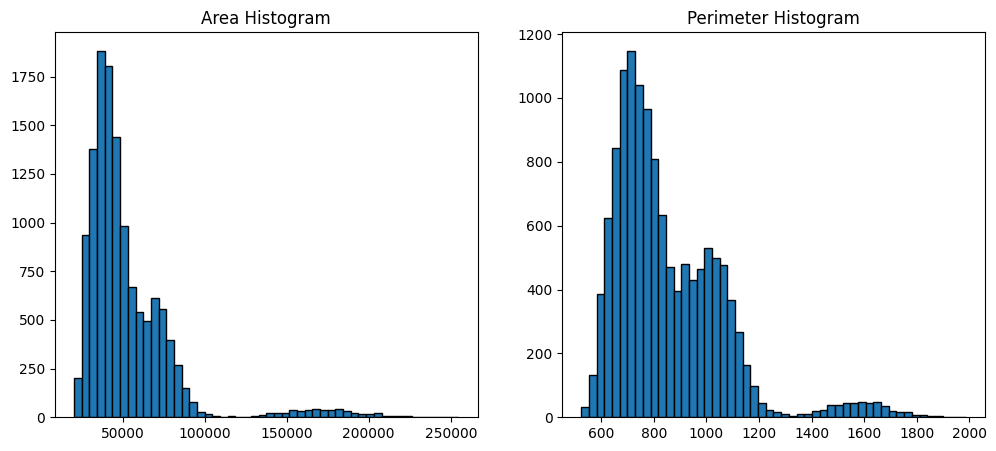

,Area,Perimeter
count,12930.000000,12930.000000
mean,53020.594973,855.094134
std,29283.485203,214.095166
min,20420.000000,524.736000
25%,36321.250000,703.388500
50%,44645.000000,794.841500
75%,61342.750000,977.175250
max,254616.000000,1985.370000


In [ ]:
import matplotlib.pyplot as plt

# Area ve Perimeter için histogram çizelim
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['Area'].dropna(), bins=50, edgecolor='k')
axes[0].set_title('Area Histogram')

axes[1].hist(df['Perimeter'].dropna(), bins=50, edgecolor='k')
axes[1].set_title('Perimeter Histogram')

plt.show()

# Ayrıca temel istatistiklere bakalım
df[['Area', 'Perimeter']].describe()


Eksik veri doldurma yöntemine karar verebilmek için "Area" ve "Perimeter" değişkenlerine ait dağılımlar incelenmiştir. Her iki değişkenin histogramında dağılımın sağa çarpık (pozitif çarpıklık) olduğu gözlemlenmiştir. Bu durum, büyük değerlerin küçük bir kısmının veride yer aldığını ve ortalamayı yukarı çektiğini göstermektedir. Nitekim her iki değişkende de ortalama (mean), medyandan (50. yüzdelik değer) büyüktür. Özellikle "Area" değişkeninde maksimum değerin 254.616 gibi oldukça uç bir değere sahip olması, veri setinde aykırı (outlier) değerlerin bulunduğuna işaret etmektedir. Bu tür sağa çarpık ve aykırı değerler içeren dağılımlarda, eksik verilerin ortalama ile doldurulması yanıltıcı sonuçlar doğurabilir. Çünkü ortalama, aykırı değerlerden yüksek oranda etkilenir. Buna karşın, medyan merkezi eğilimi daha sağlıklı yansıttığı için bu tür durumlarda daha güvenilir bir tamamlayıcı yöntemdir. Bu nedenle "Area" ve "Perimeter" değişkenlerinde eksik değerler medyan kullanılarak doldurulmuştur.

In [ ]:
# Area ve Perimeter eksik değerlerini medyan ile dolduralım
for col in ['Area', 'Perimeter']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Eksik değerlerin yeniden kontrolü
df.isnull().sum()


<ipython-input-4-b8f40ace86b1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,4764
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
# Sadece 'Eccentricity' sütununda eksik olan satırları silelim
df.dropna(subset=['Eccentricity'], inplace=True)

# Tekrar eksik veri kontrolü
df.isnull().sum()


,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


Aykırı değerleri görelim

In [ ]:
# Sadece sayısal sütunları seçelim (Class hariç)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Aykırı değerleri tutacak bir sözlük
outlier_summary = {}

# Her sayısal sütun için IQR hesaplayalım
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri tespit edelim
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = len(outliers)

# Sonuçları gösterelim
for col, count in outlier_summary.items():
    print(f"{col} sütununda {count} aykırı değer var.")


Area sütununda 353 aykırı değer var.
Perimeter sütununda 319 aykırı değer var.
MajorAxisLength sütununda 250 aykırı değer var.
MinorAxisLength sütununda 364 aykırı değer var.
AspectRation sütununda 281 aykırı değer var.
Eccentricity sütununda 536 aykırı değer var.
ConvexArea sütununda 354 aykırı değer var.
EquivDiameter sütununda 337 aykırı değer var.
Extent sütununda 179 aykırı değer var.
Solidity sütununda 523 aykırı değer var.
roundness sütununda 51 aykırı değer var.
Compactness sütununda 54 aykırı değer var.
ShapeFactor1 sütununda 342 aykırı değer var.
ShapeFactor2 sütununda 0 aykırı değer var.
ShapeFactor3 sütununda 121 aykırı değer var.
ShapeFactor4 sütununda 497 aykırı değer var.


Veri setindeki aykırı değerleri tespit edebilmek için her bir sayısal değişken için IQR (Interquartile Range) yöntemi kullanılmış ve alt üst sınırlar dışında kalan gözlemler aykırı değer olarak tanımlanmıştır. Yapılan analiz sonucunda, birçok sütunda yüzlerce aykırı değer olduğu görülmüştür. Örneğin, "Eccentricity" sütununda 536, "Solidity" sütununda 523 ve "ConvexArea" sütununda 354 aykırı değer tespit edilmiştir. Bu kadar yüksek sayıda aykırı değerin doğrudan silinmesi durumunda, veri setinden önemli miktarda bilgi kaybı yaşanabileceği ve model performansının düşebileceği öngörülmüştür.

Bu nedenle, aykırı değerleri silmek yerine "baskılama" (winsorization) yöntemi tercih edilmiştir. Bu yöntemde, aykırı değerler alt ve üst sınır değerlerine eşitlenerek veri setinde tutulur, ancak etkileri azaltılır. Böylece, hem verinin bütünlüğü korunmuş hem de modelin aşırı uç değerlerden etkilenmesi önlenmiş olur. Özellikle makine öğrenmesi algoritmalarının istatistiksel kararlılığı açısından, bu yöntem aykırı değerlerin zarar verici etkisini sınırlamak için etkili ve güvenilir bir yaklaşım olarak değerlendirilmiştir.

In [ ]:
# Tüm sayısal sütunlarda winsorization (sınırla baskılama) uygulayalım
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Alt ve üst sınırla baskılayalım
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [ ]:
# Tekrar aykırı değer kontrolü yapalım
outlier_summary_after = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary_after[col] = len(outliers)

for col, count in outlier_summary_after.items():
    print(f"{col} sütununda {count} aykırı değer kaldı.")


Area sütununda 0 aykırı değer kaldı.
Perimeter sütununda 0 aykırı değer kaldı.
MajorAxisLength sütununda 0 aykırı değer kaldı.
MinorAxisLength sütununda 0 aykırı değer kaldı.
AspectRation sütununda 0 aykırı değer kaldı.
Eccentricity sütununda 0 aykırı değer kaldı.
ConvexArea sütununda 0 aykırı değer kaldı.
EquivDiameter sütununda 0 aykırı değer kaldı.
Extent sütununda 0 aykırı değer kaldı.
Solidity sütununda 0 aykırı değer kaldı.
roundness sütununda 0 aykırı değer kaldı.
Compactness sütununda 0 aykırı değer kaldı.
ShapeFactor1 sütununda 0 aykırı değer kaldı.
ShapeFactor2 sütununda 0 aykırı değer kaldı.
ShapeFactor3 sütununda 0 aykırı değer kaldı.
ShapeFactor4 sütununda 0 aykırı değer kaldı.


Sınırlı baskılama (winsorization) işlemi sonrasında yapılan IQR temelli aykırı değer analizi sonucunda, tüm sayısal sütunlarda aykırı değer kalmadığı gözlemlenmiştir. Bu durum, baskılama işleminin etkili bir şekilde çalıştığını ve verinin istatistiksel olarak daha güvenli hale getirildiğini göstermektedir.

4.Özellik Ölçekleme (Feature Scaling):

Özellik ölçeklemenin amacı:

Veri setindeki farklı ölçekleri normalize etmek.

Örneğin bir özellik 0–1 arasında iken, başka bir özellik 0–10.000 arasında olabilir.

Böyle farklı ölçekler makine öğrenmesi algoritmalarını yanıltır.

Özellikle mesafe tabanlı algoritmalar (KNN, SVM, Logistic Regression, vb.) için zorunludur.

Bu algoritmalar "uzaklık" ölçtüğü için tüm değişkenlerin aynı ölçeklerde olması gerekir.

Model eğitim süresini ve doğruluğunu artırır.

Ölçeklenmemiş veriler modelin optimizasyonunu zorlaştırır.

** Özelliklerin eşit katkı yapabilmesi için ölçekleme yapıyoruz.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Sayısal sütunlar (Class hariç)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# MinMaxScaler başlatalım
scaler = MinMaxScaler()

# Sayısal sütunları ölçekleyelim
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Kontrol edelim: İlk 5 satırı görelim
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,0.106366,0.131038,0.044791,0.358917,0.065807,0.0,0.106609,0.140198,0.670951,0.378104,0.646779,1.000000,0.571094,0.967286,1.000000,0.895290,SEKER
2,0.114630,0.114922,0.077349,0.312982,0.167807,0.0,0.113115,0.150181,0.647521,0.680900,0.862070,0.882877,0.619728,0.800761,0.904721,0.947352,SEKER
4,0.124354,0.110315,0.048293,0.409859,0.032619,0.0,0.122246,0.161785,0.627452,0.769258,0.993149,1.000000,0.519454,1.000000,1.000000,0.955534,SEKER
5,0.126132,0.127456,0.076646,0.350651,0.132724,0.0,0.124545,0.163892,0.637818,0.677658,0.847918,0.934570,0.578686,0.834669,0.965273,0.961243,SEKER
6,0.128665,0.168135,0.072648,0.367726,0.110665,0.0,0.129192,0.166884,0.584647,0.318234,0.526581,0.967925,0.561238,0.863474,1.000000,0.945927,SEKER


5. Kategorik Verilerin Kodlanması:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder başlatalım
le = LabelEncoder()

# Class sütununu kodlayalım
df['Class'] = le.fit_transform(df['Class'])

# Kodlamadan sonra ilk 5 satırı görelim
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,0.106366,0.131038,0.044791,0.358917,0.065807,0.0,0.106609,0.140198,0.670951,0.378104,0.646779,1.000000,0.571094,0.967286,1.000000,0.895290,5
2,0.114630,0.114922,0.077349,0.312982,0.167807,0.0,0.113115,0.150181,0.647521,0.680900,0.862070,0.882877,0.619728,0.800761,0.904721,0.947352,5
4,0.124354,0.110315,0.048293,0.409859,0.032619,0.0,0.122246,0.161785,0.627452,0.769258,0.993149,1.000000,0.519454,1.000000,1.000000,0.955534,5
5,0.126132,0.127456,0.076646,0.350651,0.132724,0.0,0.124545,0.163892,0.637818,0.677658,0.847918,0.934570,0.578686,0.834669,0.965273,0.961243,5
6,0.128665,0.168135,0.072648,0.367726,0.110665,0.0,0.129192,0.166884,0.584647,0.318234,0.526581,0.967925,0.561238,0.863474,1.000000,0.945927,5


In [ ]:
# Label Encoder sınıf etiket haritası
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'BARBUNYA': np.int64(0), 'BOMBAY': np.int64(1), 'CALI': np.int64(2), 'DERMASON': np.int64(3), 'HOROZ': np.int64(4), 'SEKER': np.int64(5), 'SIRA': np.int64(6)}


**Bölüm 2: Özellik Seçimi ve Boyut İndirgeme**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Özellikler (X) ve etiketler (y)
X = df.drop('Class', axis=1)
y = df['Class']

# PCA başlatalım
pca = PCA()
X_pca = pca.fit_transform(X)

# Açıklanan varyans oranları
explained_variance = pca.explained_variance_ratio_

# Açıklanan varyansları gösterelim
for i, var in enumerate(explained_variance):
    print(f"Bileşen {i+1}: {var:.4f}")

# Ortalama varyans oranı
mean_variance = np.mean(explained_variance)
print(f"\nOrtalama açıklanan varyans oranı: {mean_variance:.4f}")


Bileşen 1: 0.5954
Bileşen 2: 0.2364
Bileşen 3: 0.0786
Bileşen 4: 0.0425
Bileşen 5: 0.0316
Bileşen 6: 0.0074
Bileşen 7: 0.0034
Bileşen 8: 0.0023
Bileşen 9: 0.0017
Bileşen 10: 0.0004
Bileşen 11: 0.0001
Bileşen 12: 0.0001
Bileşen 13: 0.0001
Bileşen 14: 0.0000
Bileşen 15: 0.0000
Bileşen 16: 0.0000

Ortalama açıklanan varyans oranı: 0.0625


PCA uygulaması sonucunda ilk bileşen verideki toplam varyansın yaklaşık %59.5’ini, ikinci bileşen %23.6’sını ve üçüncü bileşen %7.8’ini açıklamaktadır. Ortalama varyans oranı %6.25 olup, ilk 3 bileşen toplamda yaklaşık %91 oranında bilgiyi temsil etmektedir. Bu da boyut indirgemede ilk birkaç bileşenin yeterli olabileceğini göstermektedir.

In [ ]:
# 3 bileşen seçerek PCA uygulayalım
pca = PCA(n_components=3)
X_pca_selected = pca.fit_transform(X)

# PCA sonrası ilk 5 satırı görelim
print(X_pca_selected[:5])


[[-1.14367581  0.4350547  -0.47073473]
 [-1.14793473  0.35186482 -0.11784331]
 [-1.29009266  0.58347746 -0.11249821]
 [-1.16021641  0.43845601 -0.13848291]
 [-1.0241515   0.39732199 -0.47356262]]


PCA ilk olarak tüm bileşenlerle fit edilmiştir ve her bileşenin açıkladığı varyans oranları hesaplanmıştır.

Elde edilen varyans oranlarına göre ilk üç bileşen seçilmiştir çünkü bu bileşenler, veri setindeki bilginin büyük kısmını (örneğin %95’in üzerini) temsil etmektedir.

Bu üç bileşenden yalnızca ilk iki tanesi görselleştirme amacıyla scatter plot’ta kullanılmıştır.

scatter plot çizimi

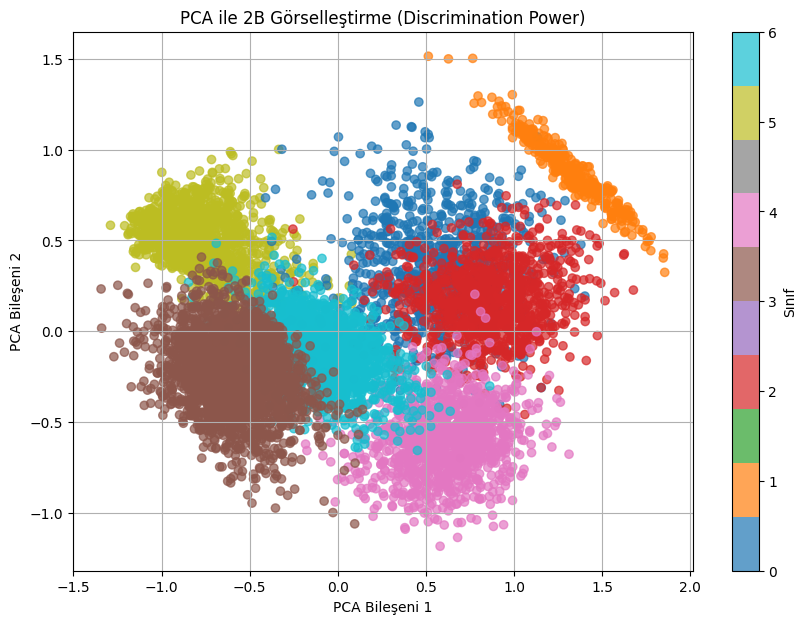

In [ ]:
import matplotlib.pyplot as plt

# PCA1 ve PCA2 değerlerini alalım
x1 = X_pca_selected[:, 0]
x2 = X_pca_selected[:, 1]

# Scatter plot çizelim
plt.figure(figsize=(10, 7))
scatter = plt.scatter(x1, x2, c=y, cmap='tab10', alpha=0.7)
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.title('PCA ile 2B Görselleştirme (Discrimination Power)')
plt.colorbar(scatter, label='Sınıf')
plt.grid(True)
plt.show()


PCA ile yapılan boyut indirgeme işlemi, yüksek boyutlu veriyi bilgi kaybını en aza indirerek 2 boyuta düşürmek için kullanılmıştır. İlk iki bileşen, verideki varyansın büyük kısmını açıklamaktadır. Oluşturulan scatter plot’ta her bir renk bir sınıfı temsil eder ve sınıfların ayrışma durumu gözlemlenmiştir. Grafik, sınıflar arası ayrımın belirgin olduğunu ve PCA'nın veri ayrıştırma gücünü etkili şekilde yansıttığını göstermektedir. Bu sayede sınıflandırma modelleri için daha kompakt ve anlamlı bir veri temsili elde edilmiştir.

7. LDA (Linear Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA başlatalım (n_components=3 seçerek)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X, y)

# LDA sonrası ilk 5 satırı görelim
print(X_lda[:5])


[[ 1.33425161 -2.67105356  1.44991198]
 [ 2.67625941 -3.87994482 -0.91439572]
 [ 0.28036441 -4.05340427  1.7990377 ]
 [ 2.99232009 -3.60977406 -0.51722402]
 [ 3.95134363 -2.13790969  0.7828991 ]]


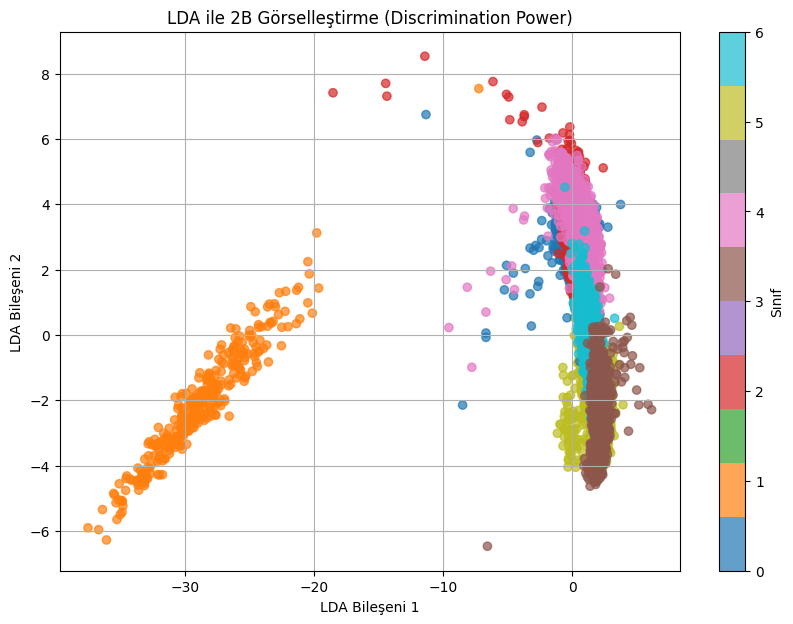

In [ ]:
import matplotlib.pyplot as plt

# LDA1 ve LDA2 değerlerini alalım
lda1 = X_lda[:, 0]
lda2 = X_lda[:, 1]

# Scatter plot çizelim
plt.figure(figsize=(10, 7))
scatter = plt.scatter(lda1, lda2, c=y, cmap='tab10', alpha=0.7)
plt.xlabel('LDA Bileşeni 1')
plt.ylabel('LDA Bileşeni 2')
plt.title('LDA ile 2B Görselleştirme (Discrimination Power)')
plt.colorbar(scatter, label='Sınıf')
plt.grid(True)
plt.show()


Bu işlemde Linear Discriminant Analysis (LDA) ile 3 bileşene indirgenen verinin ilk iki bileşeni kullanılarak görselleştirme yapılmıştır. Scatter plot üzerinde her bir renk farklı bir sınıfı temsil eder. Grafik, sınıflar arasında belirgin bir ayrım olduğunu göstermektedir. Bu da LDA’nın sınıfları ayırma (discrimination power) açısından oldukça başarılı olduğunu ortaya koymaktadır. Özellikle Sınıf 1 (turuncu), diğerlerinden oldukça iyi ayrışmıştır. Kısacası, LDA sayesinde boyut indirgeme yapılırken sınıflar arası ayrım korunmuş ve sınıflandırma modelleri için daha anlamlı bir veri temsili elde edilmiştir.



**Bölüm 3: Modelleme ve Değerlendirme**



8. Nested Cross-Validation Yapısı:

Dış döngü (outer loop): 5 katmanlı CV (5-Fold)

İç döngü (inner loop): 3 katmanlı CV (3-Fold)

İç döngüde hiperparametre ayarlaması yapılacak.

Random state ayarlaması:

İç döngü: sabit kalacak (aynı train/validation bölünmesi).

Dış döngü: her katmanda veriler yeniden karıştırılacak.

Nested Cross-Validation Ne Anlama Geliyor?

Outer CV: Modelin gerçek performansını ölçmek için test seti oluşturur.

Inner CV: Eğitim setini kendi içinde tekrar bölerek hiperparametre ayarlaması yapar.

Böylece model gerçekçi, abartısız bir performans ölçümü sağlar.

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Outer CV: 5-Fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inner CV: 3-Fold (hiperparametre tuning için)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Örnek model ve hiperparametre grid (şimdilik Logistic Regression için)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# GridSearchCV (iç döngüde tuning için)
grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy')

# Outer loop içinde performansı ölçelim
scores = cross_val_score(grid_search, X, y, cv=outer_cv, scoring='accuracy')

print(f"Ortalama Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Ortalama Accuracy: 0.9233 (+/- 0.0042)


Sonuç:

Ortalama Accuracy: 0.9233

Standart Sapma: ± 0.0042

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model: Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# İç döngüde GridSearchCV
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_dt = cross_val_score(grid_search_dt, X, y, cv=outer_cv, scoring='accuracy')

print(f"Decision Tree - Ortalama Accuracy: {scores_dt.mean():.4f} (+/- {scores_dt.std():.4f})")


Decision Tree - Ortalama Accuracy: 0.9018 (+/- 0.0062)


Ortalama Accuracy: 0.9018

Standart Sapma: ± 0.0062

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model: Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

# İç döngüde GridSearchCV
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_rf = cross_val_score(grid_search_rf, X, y, cv=outer_cv, scoring='accuracy')

print(f"Random Forest - Ortalama Accuracy: {scores_rf.mean():.4f} (+/- {scores_rf.std():.4f})")


Random Forest - Ortalama Accuracy: 0.9186 (+/- 0.0060)


Ortalama Accuracy: 0.9186

Standart Sapma: ± 0.0060

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Model: XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hiperparametre grid'i
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# İç döngüde GridSearchCV
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_xgb = cross_val_score(grid_search_xgb, X, y, cv=outer_cv, scoring='accuracy')

print(f"XGBoost - Ortalama Accuracy: {scores_xgb.mean():.4f} (+/- {scores_xgb.std():.4f})")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Ortalama Accuracy: 0.9240 (+/- 0.0053)


Ortalama Accuracy: 0.9240

Standart Sapma: ± 0.0053

**Naive Bayes (GaussianNB)**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Model: Gaussian Naive Bayes
model_nb = GaussianNB()

# Dış döngüde cross_val_score ile ölçüm (direkt model kullanılıyor, GridSearch yok)
scores_nb = cross_val_score(model_nb, X, y, cv=outer_cv, scoring='accuracy')

print(f"Naive Bayes - Ortalama Accuracy: {scores_nb.mean():.4f} (+/- {scores_nb.std():.4f})")


Naive Bayes - Ortalama Accuracy: 0.8965 (+/- 0.0059)


**PCA verisi ile Logistic Regression Nested CV**


In [ ]:
# PCA verisini ve etiketleri kullanalım
X_pca = X_pca_selected
y_pca = y

# Model: Logistic Regression
model_lr_pca = LogisticRegression(max_iter=1000)

# Hiperparametre grid'i
param_grid_lr_pca = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# İç döngüde GridSearchCV
grid_search_lr_pca = GridSearchCV(model_lr_pca, param_grid_lr_pca, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_lr_pca = cross_val_score(grid_search_lr_pca, X_pca, y_pca, cv=outer_cv, scoring='accuracy')

print(f"PCA + Logistic Regression - Ortalama Accuracy: {scores_lr_pca.mean():.4f} (+/- {scores_lr_pca.std():.4f})")


PCA + Logistic Regression - Ortalama Accuracy: 0.8840 (+/- 0.0077)


**PCA verisi için Decision Tree Nested CV**

In [ ]:
# Model: Decision Tree
model_dt_pca = DecisionTreeClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_dt_pca = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# İç döngüde GridSearchCV
grid_search_dt_pca = GridSearchCV(model_dt_pca, param_grid_dt_pca, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_dt_pca = cross_val_score(grid_search_dt_pca, X_pca, y_pca, cv=outer_cv, scoring='accuracy')

print(f"PCA + Decision Tree - Ortalama Accuracy: {scores_dt_pca.mean():.4f} (+/- {scores_dt_pca.std():.4f})")


PCA + Decision Tree - Ortalama Accuracy: 0.8649 (+/- 0.0045)


**PCA verisi için Random Forest Nested CV**

In [ ]:
# Model: Random Forest
model_rf_pca = RandomForestClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_rf_pca = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

# İç döngüde GridSearchCV
grid_search_rf_pca = GridSearchCV(model_rf_pca, param_grid_rf_pca, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_rf_pca = cross_val_score(grid_search_rf_pca, X_pca, y_pca, cv=outer_cv, scoring='accuracy')

print(f"PCA + Random Forest - Ortalama Accuracy: {scores_rf_pca.mean():.4f} (+/- {scores_rf_pca.std():.4f})")


PCA + Random Forest - Ortalama Accuracy: 0.8853 (+/- 0.0075)


**PCA verisi için XGBoost Nested CV**

In [ ]:
# Model: XGBoost
model_xgb_pca = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hiperparametre grid'i
param_grid_xgb_pca = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# İç döngüde GridSearchCV
grid_search_xgb_pca = GridSearchCV(model_xgb_pca, param_grid_xgb_pca, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_xgb_pca = cross_val_score(grid_search_xgb_pca, X_pca, y_pca, cv=outer_cv, scoring='accuracy')

print(f"PCA + XGBoost - Ortalama Accuracy: {scores_xgb_pca.mean():.4f} (+/- {scores_xgb_pca.std():.4f})")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:50:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:50:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:50:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:50:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

PCA + XGBoost - Ortalama Accuracy: 0.8869 (+/- 0.0062)


**PCA verisi için Naive Bayes Nested CV**

In [ ]:
# Model: Gaussian Naive Bayes
model_nb_pca = GaussianNB()

# Dış döngüde cross_val_score ile ölçüm
scores_nb_pca = cross_val_score(model_nb_pca, X_pca, y_pca, cv=outer_cv, scoring='accuracy')

print(f"PCA + Naive Bayes - Ortalama Accuracy: {scores_nb_pca.mean():.4f} (+/- {scores_nb_pca.std():.4f})")


PCA + Naive Bayes - Ortalama Accuracy: 0.8682 (+/- 0.0038)


**LDA Verisi + Logistic Regression**

In [ ]:
# LDA verisini ve etiketleri kullanalım
X_lda_data = X_lda
y_lda_data = y

# Model: Logistic Regression
model_lr_lda = LogisticRegression(max_iter=1000)

# Hiperparametre grid'i
param_grid_lr_lda = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# İç döngüde GridSearchCV
grid_search_lr_lda = GridSearchCV(model_lr_lda, param_grid_lr_lda, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_lr_lda = cross_val_score(grid_search_lr_lda, X_lda_data, y_lda_data, cv=outer_cv, scoring='accuracy')

print(f"LDA + Logistic Regression - Ortalama Accuracy: {scores_lr_lda.mean():.4f} (+/- {scores_lr_lda.std():.4f})")


LDA + Logistic Regression - Ortalama Accuracy: 0.8071 (+/- 0.0031)


**LDA verisi için Decision Tree Nested CV**

In [ ]:
# Model: Decision Tree
model_dt_lda = DecisionTreeClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_dt_lda = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# İç döngüde GridSearchCV
grid_search_dt_lda = GridSearchCV(model_dt_lda, param_grid_dt_lda, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_dt_lda = cross_val_score(grid_search_dt_lda, X_lda_data, y_lda_data, cv=outer_cv, scoring='accuracy')

print(f"LDA + Decision Tree - Ortalama Accuracy: {scores_dt_lda.mean():.4f} (+/- {scores_dt_lda.std():.4f})")


LDA + Decision Tree - Ortalama Accuracy: 0.8162 (+/- 0.0050)


**LDA verisi için Random Forest Nested CV**

In [ ]:
# Model: Random Forest
model_rf_lda = RandomForestClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_rf_lda = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

# İç döngüde GridSearchCV
grid_search_rf_lda = GridSearchCV(model_rf_lda, param_grid_rf_lda, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_rf_lda = cross_val_score(grid_search_rf_lda, X_lda_data, y_lda_data, cv=outer_cv, scoring='accuracy')

print(f"LDA + Random Forest - Ortalama Accuracy: {scores_rf_lda.mean():.4f} (+/- {scores_rf_lda.std():.4f})")


LDA + Random Forest - Ortalama Accuracy: 0.8404 (+/- 0.0051)


**LDA verisi için XGBoost Nested CV**

In [ ]:
# Model: XGBoost
model_xgb_lda = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hiperparametre grid'i
param_grid_xgb_lda = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# İç döngüde GridSearchCV
grid_search_xgb_lda = GridSearchCV(model_xgb_lda, param_grid_xgb_lda, cv=inner_cv, scoring='accuracy')

# Dış döngüde cross_val_score ile ölçüm
scores_xgb_lda = cross_val_score(grid_search_xgb_lda, X_lda_data, y_lda_data, cv=outer_cv, scoring='accuracy')

print(f"LDA + XGBoost - Ortalama Accuracy: {scores_xgb_lda.mean():.4f} (+/- {scores_xgb_lda.std():.4f})")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

LDA + XGBoost - Ortalama Accuracy: 0.8395 (+/- 0.0033)


**LDA verisi için Naive Bayes Nested CV**

In [ ]:
# Model: Gaussian Naive Bayes
model_nb_lda = GaussianNB()

# Dış döngüde cross_val_score ile ölçüm
scores_nb_lda = cross_val_score(model_nb_lda, X_lda_data, y_lda_data, cv=outer_cv, scoring='accuracy')

print(f"LDA + Naive Bayes - Ortalama Accuracy: {scores_nb_lda.mean():.4f} (+/- {scores_nb_lda.std():.4f})")


LDA + Naive Bayes - Ortalama Accuracy: 0.7907 (+/- 0.0061)


**(Ham Veri + Logistic Regression için)**

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model
model_lr = LogisticRegression(max_iter=1000)

# Hiperparametre grid'i
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Outer ve Inner CV yapıları
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Metriği tutacak listeler
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search = GridSearchCV(model_lr, param_grid_lr, cv=inner_cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # En iyi modeli al
    best_model = grid_search.best_estimator_

    # Test setinde tahmin
    y_pred = best_model.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Sonuçları listele
    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list):.4f} (+/- {np.std(accuracy_list):.4f})")
print(f"Precision: {np.mean(precision_list):.4f} (+/- {np.std(precision_list):.4f})")
print(f"Recall: {np.mean(recall_list):.4f} (+/- {np.std(recall_list):.4f})")
print(f"F1 Score: {np.mean(f1_list):.4f} (+/- {np.std(f1_list):.4f})")


Accuracy: 0.9233 (+/- 0.0042)
Precision: 0.9366 (+/- 0.0037)
Recall: 0.9345 (+/- 0.0045)
F1 Score: 0.9354 (+/- 0.0040)


**Ham Veri + Decision Tree için 4 metrik ölçüm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model: Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Outer ve Inner CV yapıları (zaten hazırdı, tekrar tanımlamaya gerek yok)

# Metriği tutacak listeler
accuracy_list_dt = []
precision_list_dt = []
recall_list_dt = []
f1_list_dt = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=inner_cv, scoring='accuracy')
    grid_search_dt.fit(X_train, y_train)

    # En iyi modeli al
    best_model_dt = grid_search_dt.best_estimator_

    # Test setinde tahmin
    y_pred_dt = best_model_dt.predict(X_test)

    # Metrikleri hesapla
    acc_dt = accuracy_score(y_test, y_pred_dt)
    prec_dt = precision_score(y_test, y_pred_dt, average='macro')
    rec_dt = recall_score(y_test, y_pred_dt, average='macro')
    f1_dt = f1_score(y_test, y_pred_dt, average='macro')

    # Sonuçları listele
    accuracy_list_dt.append(acc_dt)
    precision_list_dt.append(prec_dt)
    recall_list_dt.append(rec_dt)
    f1_list_dt.append(f1_dt)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_dt):.4f} (+/- {np.std(accuracy_list_dt):.4f})")
print(f"Precision: {np.mean(precision_list_dt):.4f} (+/- {np.std(precision_list_dt):.4f})")
print(f"Recall: {np.mean(recall_list_dt):.4f} (+/- {np.std(recall_list_dt):.4f})")
print(f"F1 Score: {np.mean(f1_list_dt):.4f} (+/- {np.std(f1_list_dt):.4f})")


Accuracy: 0.9018 (+/- 0.0062)
Precision: 0.9167 (+/- 0.0049)
Recall: 0.9135 (+/- 0.0084)
F1 Score: 0.9148 (+/- 0.0068)


**Ham Veri + Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model: Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

# Metriği tutacak listeler
accuracy_list_rf = []
precision_list_rf = []
recall_list_rf = []
f1_list_rf = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=inner_cv, scoring='accuracy')
    grid_search_rf.fit(X_train, y_train)

    # En iyi modeli al
    best_model_rf = grid_search_rf.best_estimator_

    # Test setinde tahmin
    y_pred_rf = best_model_rf.predict(X_test)

    # Metrikleri hesapla
    acc_rf = accuracy_score(y_test, y_pred_rf)
    prec_rf = precision_score(y_test, y_pred_rf, average='macro')
    rec_rf = recall_score(y_test, y_pred_rf, average='macro')
    f1_rf = f1_score(y_test, y_pred_rf, average='macro')

    # Sonuçları listele
    accuracy_list_rf.append(acc_rf)
    precision_list_rf.append(prec_rf)
    recall_list_rf.append(rec_rf)
    f1_list_rf.append(f1_rf)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_rf):.4f} (+/- {np.std(accuracy_list_rf):.4f})")
print(f"Precision: {np.mean(precision_list_rf):.4f} (+/- {np.std(precision_list_rf):.4f})")
print(f"Recall: {np.mean(recall_list_rf):.4f} (+/- {np.std(recall_list_rf):.4f})")
print(f"F1 Score: {np.mean(f1_list_rf):.4f} (+/- {np.std(f1_list_rf):.4f})")


Accuracy: 0.9186 (+/- 0.0060)
Precision: 0.9327 (+/- 0.0062)
Recall: 0.9280 (+/- 0.0066)
F1 Score: 0.9301 (+/- 0.0063)


**Ham Veri + XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Model: XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hiperparametre grid'i
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Metriği tutacak listeler
accuracy_list_xgb = []
precision_list_xgb = []
recall_list_xgb = []
f1_list_xgb = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=inner_cv, scoring='accuracy')
    grid_search_xgb.fit(X_train, y_train)

    # En iyi modeli al
    best_model_xgb = grid_search_xgb.best_estimator_

    # Test setinde tahmin
    y_pred_xgb = best_model_xgb.predict(X_test)

    # Metrikleri hesapla
    acc_xgb = accuracy_score(y_test, y_pred_xgb)
    prec_xgb = precision_score(y_test, y_pred_xgb, average='macro')
    rec_xgb = recall_score(y_test, y_pred_xgb, average='macro')
    f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

    # Sonuçları listele
    accuracy_list_xgb.append(acc_xgb)
    precision_list_xgb.append(prec_xgb)
    recall_list_xgb.append(rec_xgb)
    f1_list_xgb.append(f1_xgb)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_xgb):.4f} (+/- {np.std(accuracy_list_xgb):.4f})")
print(f"Precision: {np.mean(precision_list_xgb):.4f} (+/- {np.std(precision_list_xgb):.4f})")
print(f"Recall: {np.mean(recall_list_xgb):.4f} (+/- {np.std(recall_list_xgb):.4f})")
print(f"F1 Score: {np.mean(f1_list_xgb):.4f} (+/- {np.std(f1_list_xgb):.4f})")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy: 0.9240 (+/- 0.0053)
Precision: 0.9373 (+/- 0.0051)
Recall: 0.9352 (+/- 0.0045)
F1 Score: 0.9361 (+/- 0.0046)


**Ham Veri + Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Model: Gaussian Naive Bayes
model_nb = GaussianNB()

# Metriği tutacak listeler
accuracy_list_nb = []
precision_list_nb = []
recall_list_nb = []
f1_list_nb = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Direkt model eğitimi
    model_nb.fit(X_train, y_train)

    # Test setinde tahmin
    y_pred_nb = model_nb.predict(X_test)

    # Metrikleri hesapla
    acc_nb = accuracy_score(y_test, y_pred_nb)
    prec_nb = precision_score(y_test, y_pred_nb, average='macro')
    rec_nb = recall_score(y_test, y_pred_nb, average='macro')
    f1_nb = f1_score(y_test, y_pred_nb, average='macro')

    # Sonuçları listele
    accuracy_list_nb.append(acc_nb)
    precision_list_nb.append(prec_nb)
    recall_list_nb.append(rec_nb)
    f1_list_nb.append(f1_nb)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_nb):.4f} (+/- {np.std(accuracy_list_nb):.4f})")
print(f"Precision: {np.mean(precision_list_nb):.4f} (+/- {np.std(precision_list_nb):.4f})")
print(f"Recall: {np.mean(recall_list_nb):.4f} (+/- {np.std(recall_list_nb):.4f})")
print(f"F1 Score: {np.mean(f1_list_nb):.4f} (+/- {np.std(f1_list_nb):.4f})")


Accuracy: 0.8965 (+/- 0.0059)
Precision: 0.9079 (+/- 0.0070)
Recall: 0.9061 (+/- 0.0064)
F1 Score: 0.9065 (+/- 0.0065)


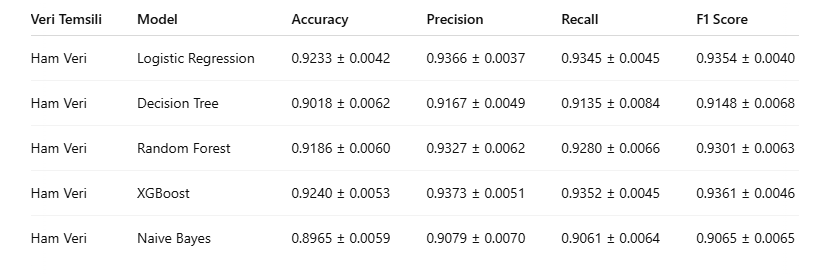

**PCA + Logistic Regression**

In [ ]:
# PCA verisini ve etiketleri kullanalım
X_pca_data = X_pca_selected
y_pca_data = y

# Model: Logistic Regression
model_lr_pca = LogisticRegression(max_iter=1000)

# Hiperparametre grid'i
param_grid_lr_pca = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Metriği tutacak listeler
accuracy_list_lr_pca = []
precision_list_lr_pca = []
recall_list_lr_pca = []
f1_list_lr_pca = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_pca_data, y_pca_data):
    X_train, X_test = X_pca_data[train_idx], X_pca_data[test_idx]
    y_train, y_test = y_pca_data.iloc[train_idx], y_pca_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_lr_pca = GridSearchCV(model_lr_pca, param_grid_lr_pca, cv=inner_cv, scoring='accuracy')
    grid_search_lr_pca.fit(X_train, y_train)

    # En iyi modeli al
    best_model_lr_pca = grid_search_lr_pca.best_estimator_

    # Test setinde tahmin
    y_pred_lr_pca = best_model_lr_pca.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_lr_pca)
    prec = precision_score(y_test, y_pred_lr_pca, average='macro')
    rec = recall_score(y_test, y_pred_lr_pca, average='macro')
    f1 = f1_score(y_test, y_pred_lr_pca, average='macro')

    # Sonuçları listele
    accuracy_list_lr_pca.append(acc)
    precision_list_lr_pca.append(prec)
    recall_list_lr_pca.append(rec)
    f1_list_lr_pca.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_lr_pca):.4f} (+/- {np.std(accuracy_list_lr_pca):.4f})")
print(f"Precision: {np.mean(precision_list_lr_pca):.4f} (+/- {np.std(precision_list_lr_pca):.4f})")
print(f"Recall: {np.mean(recall_list_lr_pca):.4f} (+/- {np.std(recall_list_lr_pca):.4f})")
print(f"F1 Score: {np.mean(f1_list_lr_pca):.4f} (+/- {np.std(f1_list_lr_pca):.4f})")


Accuracy: 0.8840 (+/- 0.0077)
Precision: 0.8856 (+/- 0.0075)
Recall: 0.8824 (+/- 0.0079)
F1 Score: 0.8830 (+/- 0.0071)


**PCA + Decision Tree**

In [ ]:
# Model: Decision Tree
model_dt_pca = DecisionTreeClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_dt_pca = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Metriği tutacak listeler
accuracy_list_dt_pca = []
precision_list_dt_pca = []
recall_list_dt_pca = []
f1_list_dt_pca = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_pca_data, y_pca_data):
    X_train, X_test = X_pca_data[train_idx], X_pca_data[test_idx]
    y_train, y_test = y_pca_data.iloc[train_idx], y_pca_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_dt_pca = GridSearchCV(model_dt_pca, param_grid_dt_pca, cv=inner_cv, scoring='accuracy')
    grid_search_dt_pca.fit(X_train, y_train)

    # En iyi modeli al
    best_model_dt_pca = grid_search_dt_pca.best_estimator_

    # Test setinde tahmin
    y_pred_dt_pca = best_model_dt_pca.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_dt_pca)
    prec = precision_score(y_test, y_pred_dt_pca, average='macro')
    rec = recall_score(y_test, y_pred_dt_pca, average='macro')
    f1 = f1_score(y_test, y_pred_dt_pca, average='macro')

    # Sonuçları listele
    accuracy_list_dt_pca.append(acc)
    precision_list_dt_pca.append(prec)
    recall_list_dt_pca.append(rec)
    f1_list_dt_pca.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_dt_pca):.4f} (+/- {np.std(accuracy_list_dt_pca):.4f})")
print(f"Precision: {np.mean(precision_list_dt_pca):.4f} (+/- {np.std(precision_list_dt_pca):.4f})")
print(f"Recall: {np.mean(recall_list_dt_pca):.4f} (+/- {np.std(recall_list_dt_pca):.4f})")
print(f"F1 Score: {np.mean(f1_list_dt_pca):.4f} (+/- {np.std(f1_list_dt_pca):.4f})")


Accuracy: 0.8649 (+/- 0.0045)
Precision: 0.8671 (+/- 0.0057)
Recall: 0.8639 (+/- 0.0047)
F1 Score: 0.8649 (+/- 0.0050)


**PCA + Random Forest**

In [ ]:
# Model: Random Forest
model_rf_pca = RandomForestClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_rf_pca = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

# Metriği tutacak listeler
accuracy_list_rf_pca = []
precision_list_rf_pca = []
recall_list_rf_pca = []
f1_list_rf_pca = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_pca_data, y_pca_data):
    X_train, X_test = X_pca_data[train_idx], X_pca_data[test_idx]
    y_train, y_test = y_pca_data.iloc[train_idx], y_pca_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_rf_pca = GridSearchCV(model_rf_pca, param_grid_rf_pca, cv=inner_cv, scoring='accuracy')
    grid_search_rf_pca.fit(X_train, y_train)

    # En iyi modeli al
    best_model_rf_pca = grid_search_rf_pca.best_estimator_

    # Test setinde tahmin
    y_pred_rf_pca = best_model_rf_pca.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_rf_pca)
    prec = precision_score(y_test, y_pred_rf_pca, average='macro')
    rec = recall_score(y_test, y_pred_rf_pca, average='macro')
    f1 = f1_score(y_test, y_pred_rf_pca, average='macro')

    # Sonuçları listele
    accuracy_list_rf_pca.append(acc)
    precision_list_rf_pca.append(prec)
    recall_list_rf_pca.append(rec)
    f1_list_rf_pca.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_rf_pca):.4f} (+/- {np.std(accuracy_list_rf_pca):.4f})")
print(f"Precision: {np.mean(precision_list_rf_pca):.4f} (+/- {np.std(precision_list_rf_pca):.4f})")
print(f"Recall: {np.mean(recall_list_rf_pca):.4f} (+/- {np.std(recall_list_rf_pca):.4f})")
print(f"F1 Score: {np.mean(f1_list_rf_pca):.4f} (+/- {np.std(f1_list_rf_pca):.4f})")


Accuracy: 0.8853 (+/- 0.0075)
Precision: 0.8868 (+/- 0.0083)
Recall: 0.8830 (+/- 0.0090)
F1 Score: 0.8835 (+/- 0.0084)


**PCA + XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Model: XGBoost
model_xgb_pca = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hiperparametre grid'i
param_grid_xgb_pca = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Metriği tutacak listeler
accuracy_list_xgb_pca = []
precision_list_xgb_pca = []
recall_list_xgb_pca = []
f1_list_xgb_pca = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_pca_data, y_pca_data):
    X_train, X_test = X_pca_data[train_idx], X_pca_data[test_idx]
    y_train, y_test = y_pca_data.iloc[train_idx], y_pca_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_xgb_pca = GridSearchCV(model_xgb_pca, param_grid_xgb_pca, cv=inner_cv, scoring='accuracy')
    grid_search_xgb_pca.fit(X_train, y_train)

    # En iyi modeli al
    best_model_xgb_pca = grid_search_xgb_pca.best_estimator_

    # Test setinde tahmin
    y_pred_xgb_pca = best_model_xgb_pca.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_xgb_pca)
    prec = precision_score(y_test, y_pred_xgb_pca, average='macro')
    rec = recall_score(y_test, y_pred_xgb_pca, average='macro')
    f1 = f1_score(y_test, y_pred_xgb_pca, average='macro')

    # Sonuçları listele
    accuracy_list_xgb_pca.append(acc)
    precision_list_xgb_pca.append(prec)
    recall_list_xgb_pca.append(rec)
    f1_list_xgb_pca.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_xgb_pca):.4f} (+/- {np.std(accuracy_list_xgb_pca):.4f})")
print(f"Precision: {np.mean(precision_list_xgb_pca):.4f} (+/- {np.std(precision_list_xgb_pca):.4f})")
print(f"Recall: {np.mean(recall_list_xgb_pca):.4f} (+/- {np.std(recall_list_xgb_pca):.4f})")
print(f"F1 Score: {np.mean(f1_list_xgb_pca):.4f} (+/- {np.std(f1_list_xgb_pca):.4f})")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:51:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:51:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:51:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy: 0.8869 (+/- 0.0062)
Precision: 0.8890 (+/- 0.0073)
Recall: 0.8849 (+/- 0.0062)
F1 Score: 0.8860 (+/- 0.0067)


**PCA + Naive Baye**

In [ ]:
# Model: Gaussian Naive Bayes
model_nb_pca = GaussianNB()

# Metriği tutacak listeler
accuracy_list_nb_pca = []
precision_list_nb_pca = []
recall_list_nb_pca = []
f1_list_nb_pca = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_pca_data, y_pca_data):
    X_train, X_test = X_pca_data[train_idx], X_pca_data[test_idx]
    y_train, y_test = y_pca_data.iloc[train_idx], y_pca_data.iloc[test_idx]

    # Modeli eğit
    model_nb_pca.fit(X_train, y_train)

    # Test setinde tahmin
    y_pred_nb_pca = model_nb_pca.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_nb_pca)
    prec = precision_score(y_test, y_pred_nb_pca, average='macro')
    rec = recall_score(y_test, y_pred_nb_pca, average='macro')
    f1 = f1_score(y_test, y_pred_nb_pca, average='macro')

    # Sonuçları listele
    accuracy_list_nb_pca.append(acc)
    precision_list_nb_pca.append(prec)
    recall_list_nb_pca.append(rec)
    f1_list_nb_pca.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_nb_pca):.4f} (+/- {np.std(accuracy_list_nb_pca):.4f})")
print(f"Precision: {np.mean(precision_list_nb_pca):.4f} (+/- {np.std(precision_list_nb_pca):.4f})")
print(f"Recall: {np.mean(recall_list_nb_pca):.4f} (+/- {np.std(recall_list_nb_pca):.4f})")
print(f"F1 Score: {np.mean(f1_list_nb_pca):.4f} (+/- {np.std(f1_list_nb_pca):.4f})")


Accuracy: 0.8682 (+/- 0.0038)
Precision: 0.8685 (+/- 0.0044)
Recall: 0.8669 (+/- 0.0039)
F1 Score: 0.8637 (+/- 0.0034)


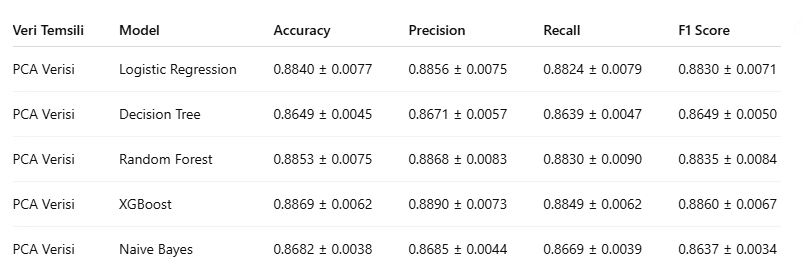

**LDA + Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model: Logistic Regression
model_lr_lda = LogisticRegression(max_iter=1000, random_state=42)

# Hiperparametre grid'i
param_grid_lr_lda = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Metriği tutacak listeler
accuracy_list_lr_lda = []
precision_list_lr_lda = []
recall_list_lr_lda = []
f1_list_lr_lda = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_lda_data, y_lda_data):
    X_train, X_test = X_lda_data[train_idx], X_lda_data[test_idx]
    y_train, y_test = y_lda_data.iloc[train_idx], y_lda_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_lr_lda = GridSearchCV(model_lr_lda, param_grid_lr_lda, cv=inner_cv, scoring='accuracy')
    grid_search_lr_lda.fit(X_train, y_train)

    # En iyi modeli al
    best_model_lr_lda = grid_search_lr_lda.best_estimator_

    # Test setinde tahmin
    y_pred_lr_lda = best_model_lr_lda.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_lr_lda)
    prec = precision_score(y_test, y_pred_lr_lda, average='macro')
    rec = recall_score(y_test, y_pred_lr_lda, average='macro')
    f1 = f1_score(y_test, y_pred_lr_lda, average='macro')

    # Sonuçları listele
    accuracy_list_lr_lda.append(acc)
    precision_list_lr_lda.append(prec)
    recall_list_lr_lda.append(rec)
    f1_list_lr_lda.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_lr_lda):.4f} (+/- {np.std(accuracy_list_lr_lda):.4f})")
print(f"Precision: {np.mean(precision_list_lr_lda):.4f} (+/- {np.std(precision_list_lr_lda):.4f})")
print(f"Recall: {np.mean(recall_list_lr_lda):.4f} (+/- {np.std(recall_list_lr_lda):.4f})")
print(f"F1 Score: {np.mean(f1_list_lr_lda):.4f} (+/- {np.std(f1_list_lr_lda):.4f})")


Accuracy: 0.8071 (+/- 0.0031)
Precision: 0.8387 (+/- 0.0039)
Recall: 0.8277 (+/- 0.0026)
F1 Score: 0.8310 (+/- 0.0024)


**LDA + Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model: Decision Tree
model_dt_lda = DecisionTreeClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_dt_lda = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Metriği tutacak listeler
accuracy_list_dt_lda = []
precision_list_dt_lda = []
recall_list_dt_lda = []
f1_list_dt_lda = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_lda_data, y_lda_data):
    X_train, X_test = X_lda_data[train_idx], X_lda_data[test_idx]
    y_train, y_test = y_lda_data.iloc[train_idx], y_lda_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_dt_lda = GridSearchCV(model_dt_lda, param_grid_dt_lda, cv=inner_cv, scoring='accuracy')
    grid_search_dt_lda.fit(X_train, y_train)

    # En iyi modeli al
    best_model_dt_lda = grid_search_dt_lda.best_estimator_

    # Test setinde tahmin
    y_pred_dt_lda = best_model_dt_lda.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_dt_lda)
    prec = precision_score(y_test, y_pred_dt_lda, average='macro')
    rec = recall_score(y_test, y_pred_dt_lda, average='macro')
    f1 = f1_score(y_test, y_pred_dt_lda, average='macro')

    # Sonuçları listele
    accuracy_list_dt_lda.append(acc)
    precision_list_dt_lda.append(prec)
    recall_list_dt_lda.append(rec)
    f1_list_dt_lda.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_dt_lda):.4f} (+/- {np.std(accuracy_list_dt_lda):.4f})")
print(f"Precision: {np.mean(precision_list_dt_lda):.4f} (+/- {np.std(precision_list_dt_lda):.4f})")
print(f"Recall: {np.mean(recall_list_dt_lda):.4f} (+/- {np.std(recall_list_dt_lda):.4f})")
print(f"F1 Score: {np.mean(f1_list_dt_lda):.4f} (+/- {np.std(f1_list_dt_lda):.4f})")


Accuracy: 0.8162 (+/- 0.0050)
Precision: 0.8446 (+/- 0.0052)
Recall: 0.8373 (+/- 0.0031)
F1 Score: 0.8401 (+/- 0.0032)


**LDA + Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model: Random Forest
model_rf_lda = RandomForestClassifier(random_state=42)

# Hiperparametre grid'i
param_grid_rf_lda = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

# Metriği tutacak listeler
accuracy_list_rf_lda = []
precision_list_rf_lda = []
recall_list_rf_lda = []
f1_list_rf_lda = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_lda_data, y_lda_data):
    X_train, X_test = X_lda_data[train_idx], X_lda_data[test_idx]
    y_train, y_test = y_lda_data.iloc[train_idx], y_lda_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_rf_lda = GridSearchCV(model_rf_lda, param_grid_rf_lda, cv=inner_cv, scoring='accuracy')
    grid_search_rf_lda.fit(X_train, y_train)

    # En iyi modeli al
    best_model_rf_lda = grid_search_rf_lda.best_estimator_

    # Test setinde tahmin
    y_pred_rf_lda = best_model_rf_lda.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_rf_lda)
    prec = precision_score(y_test, y_pred_rf_lda, average='macro')
    rec = recall_score(y_test, y_pred_rf_lda, average='macro')
    f1 = f1_score(y_test, y_pred_rf_lda, average='macro')

    # Sonuçları listele
    accuracy_list_rf_lda.append(acc)
    precision_list_rf_lda.append(prec)
    recall_list_rf_lda.append(rec)
    f1_list_rf_lda.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_rf_lda):.4f} (+/- {np.std(accuracy_list_rf_lda):.4f})")
print(f"Precision: {np.mean(precision_list_rf_lda):.4f} (+/- {np.std(precision_list_rf_lda):.4f})")
print(f"Recall: {np.mean(recall_list_rf_lda):.4f} (+/- {np.std(recall_list_rf_lda):.4f})")
print(f"F1 Score: {np.mean(f1_list_rf_lda):.4f} (+/- {np.std(f1_list_rf_lda):.4f})")


Accuracy: 0.8404 (+/- 0.0051)
Precision: 0.8705 (+/- 0.0040)
Recall: 0.8568 (+/- 0.0030)
F1 Score: 0.8617 (+/- 0.0027)


**LDA + XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Model: XGBoost
model_xgb_lda = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hiperparametre grid'i
param_grid_xgb_lda = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Metriği tutacak listeler
accuracy_list_xgb_lda = []
precision_list_xgb_lda = []
recall_list_xgb_lda = []
f1_list_xgb_lda = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_lda_data, y_lda_data):
    X_train, X_test = X_lda_data[train_idx], X_lda_data[test_idx]
    y_train, y_test = y_lda_data.iloc[train_idx], y_lda_data.iloc[test_idx]

    # İç döngü: GridSearchCV
    grid_search_xgb_lda = GridSearchCV(model_xgb_lda, param_grid_xgb_lda, cv=inner_cv, scoring='accuracy')
    grid_search_xgb_lda.fit(X_train, y_train)

    # En iyi modeli al
    best_model_xgb_lda = grid_search_xgb_lda.best_estimator_

    # Test setinde tahmin
    y_pred_xgb_lda = best_model_xgb_lda.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_xgb_lda)
    prec = precision_score(y_test, y_pred_xgb_lda, average='macro')
    rec = recall_score(y_test, y_pred_xgb_lda, average='macro')
    f1 = f1_score(y_test, y_pred_xgb_lda, average='macro')

    # Sonuçları listele
    accuracy_list_xgb_lda.append(acc)
    precision_list_xgb_lda.append(prec)
    recall_list_xgb_lda.append(rec)
    f1_list_xgb_lda.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_xgb_lda):.4f} (+/- {np.std(accuracy_list_xgb_lda):.4f})")
print(f"Precision: {np.mean(precision_list_xgb_lda):.4f} (+/- {np.std(precision_list_xgb_lda):.4f})")
print(f"Recall: {np.mean(recall_list_xgb_lda):.4f} (+/- {np.std(recall_list_xgb_lda):.4f})")
print(f"F1 Score: {np.mean(f1_list_xgb_lda):.4f} (+/- {np.std(f1_list_xgb_lda):.4f})")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:07:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:07:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:07:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:07:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy: 0.8398 (+/- 0.0045)
Precision: 0.8675 (+/- 0.0028)
Recall: 0.8587 (+/- 0.0040)
F1 Score: 0.8623 (+/- 0.0031)


**LDA + Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Model: Naive Bayes
model_nb_lda = GaussianNB()

# Metriği tutacak listeler
accuracy_list_nb_lda = []
precision_list_nb_lda = []
recall_list_nb_lda = []
f1_list_nb_lda = []

# Outer CV döngüsü
for train_idx, test_idx in outer_cv.split(X_lda_data, y_lda_data):
    X_train, X_test = X_lda_data[train_idx], X_lda_data[test_idx]
    y_train, y_test = y_lda_data.iloc[train_idx], y_lda_data.iloc[test_idx]

    # Modeli eğit
    model_nb_lda.fit(X_train, y_train)

    # Test setinde tahmin
    y_pred_nb_lda = model_nb_lda.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred_nb_lda)
    prec = precision_score(y_test, y_pred_nb_lda, average='macro')
    rec = recall_score(y_test, y_pred_nb_lda, average='macro')
    f1 = f1_score(y_test, y_pred_nb_lda, average='macro')

    # Sonuçları listele
    accuracy_list_nb_lda.append(acc)
    precision_list_nb_lda.append(prec)
    recall_list_nb_lda.append(rec)
    f1_list_nb_lda.append(f1)

# Ortalama ve standart sapmaları yazdıralım
print(f"Accuracy: {np.mean(accuracy_list_nb_lda):.4f} (+/- {np.std(accuracy_list_nb_lda):.4f})")
print(f"Precision: {np.mean(precision_list_nb_lda):.4f} (+/- {np.std(precision_list_nb_lda):.4f})")
print(f"Recall: {np.mean(recall_list_nb_lda):.4f} (+/- {np.std(recall_list_nb_lda):.4f})")
print(f"F1 Score: {np.mean(f1_list_nb_lda):.4f} (+/- {np.std(f1_list_nb_lda):.4f})")


Accuracy: 0.7907 (+/- 0.0061)
Precision: 0.8247 (+/- 0.0069)
Recall: 0.8034 (+/- 0.0074)
F1 Score: 0.8008 (+/- 0.0069)


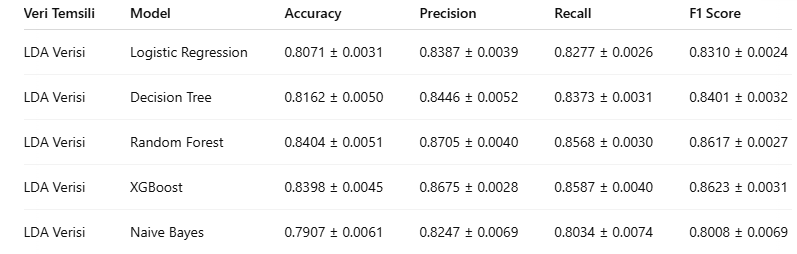

**Ham Veri Üzerinden XGBoost için ROC Eğrisi**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

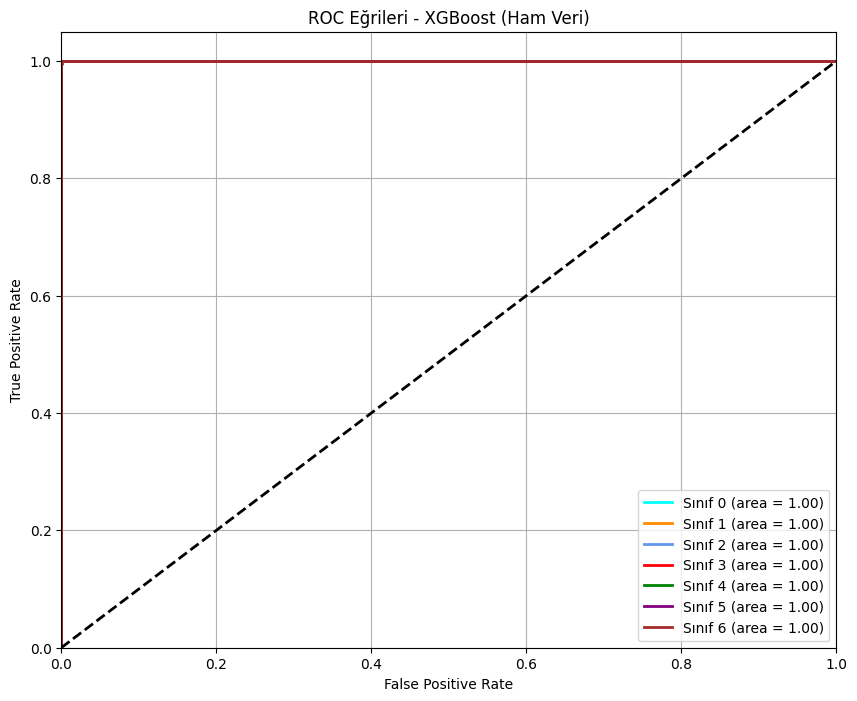

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Önce XGBoost modeli yeniden tanımla ve eğit
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# One-vs-Rest yapısıyla modeli eğit
classifier = OneVsRestClassifier(model)
classifier.fit(X, y_bin)

# Test verisine ROC Eğrisi çizeceğiz (burada tüm veri üzerinden çalışıyoruz)
y_score = classifier.predict_proba(X)

# ROC curve bilgilerini alalım
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrilerini çizelim
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown'])
plt.figure(figsize=(10,8))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Sınıf {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri - XGBoost (Ham Veri)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Bu grafik ve kod, XGBoost modeli için sınıf başına ROC eğrilerini çizmektedir. OneVsRestClassifier yapısı ile her sınıfa karşı diğerleri şeklinde model kurulmuştur. ROC eğrisi grafiklerinde her sınıf için AUC değeri (alan altında kalan alan) 1.00 çıkmıştır, bu da modelin sınıfları neredeyse kusursuz şekilde ayırdığını göstermektedir. Bu durum, modelin çok yüksek ayrım gücüne sahip olduğunu belirtir.

**PCA Verisi için XGBoost ROC Eğrisi**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:16:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:16:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:16:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


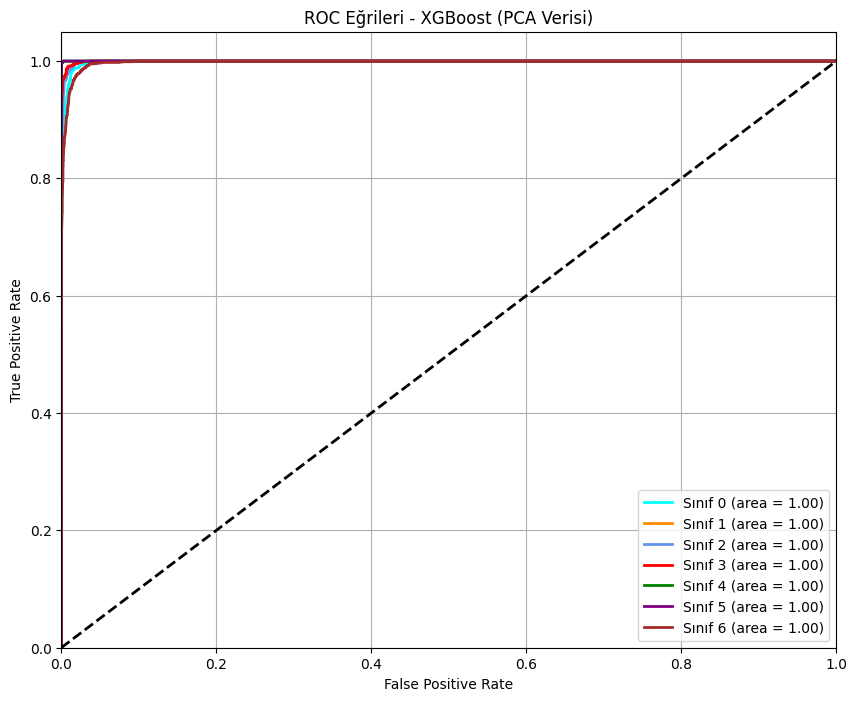

In [ ]:
# PCA verisinde ve XGBoost ile ROC Eğrisi çizimi
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from itertools import cycle

# PCA verisi ve etiketleri
X_pca = X_pca_selected  # (önceden oluşturduğumuz PCA verisi)
y_pca = y

# Etiketleri One-hot encode yap
y_pca_bin = label_binarize(y_pca, classes=np.unique(y_pca))
n_classes_pca = y_pca_bin.shape[1]

# XGBoost modeli
model_pca = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
classifier_pca = OneVsRestClassifier(model_pca)
classifier_pca.fit(X_pca, y_pca_bin)

# Tahminler
y_score_pca = classifier_pca.predict_proba(X_pca)

# ROC curve hesaplama
fpr_pca = dict()
tpr_pca = dict()
roc_auc_pca = dict()
for i in range(n_classes_pca):
    fpr_pca[i], tpr_pca[i], _ = roc_curve(y_pca_bin[:, i], y_score_pca[:, i])
    roc_auc_pca[i] = auc(fpr_pca[i], tpr_pca[i])

# Çizim
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown'])
plt.figure(figsize=(10,8))

for i, color in zip(range(n_classes_pca), colors):
    plt.plot(fpr_pca[i], tpr_pca[i], color=color, lw=2,
             label=f'Sınıf {i} (area = {roc_auc_pca[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri - XGBoost (PCA Verisi)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PCA ile boyut indirgeme uygulandıktan sonra XGBoost modeli kullanılarak ROC eğrileri oluşturulmuştur. One-vs-Rest yöntemi ile her sınıfa ait ROC eğrisi ayrı ayrı çizilmiş ve tüm sınıflar için AUC (Area Under Curve) değeri 1.00 olarak elde edilmiştir. Bu sonuç, PCA sonrası verinin sınıflar arasında çok iyi ayrılabildiğini ve modelin sınıflandırma performansının oldukça yüksek olduğunu göstermektedir.

**LDA Verisi için XGBoost ROC Eğrisi**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:18:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:18:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:18:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:18:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

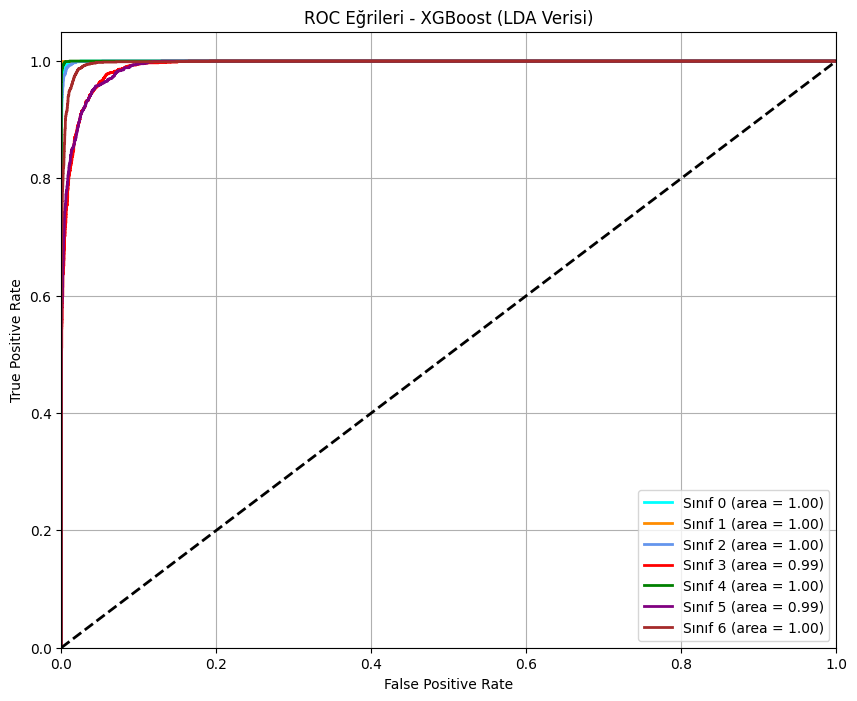

In [ ]:
# LDA verisinde ve XGBoost ile ROC Eğrisi çizimi
X_lda_data = X_lda  # (önceden oluşturduğumuz LDA verisi)
y_lda_data = y

# Etiketleri One-hot encode yap
y_lda_bin = label_binarize(y_lda_data, classes=np.unique(y_lda_data))
n_classes_lda = y_lda_bin.shape[1]

# XGBoost modeli
model_lda = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
classifier_lda = OneVsRestClassifier(model_lda)
classifier_lda.fit(X_lda_data, y_lda_bin)

# Tahminler
y_score_lda = classifier_lda.predict_proba(X_lda_data)

# ROC curve hesaplama
fpr_lda = dict()
tpr_lda = dict()
roc_auc_lda = dict()
for i in range(n_classes_lda):
    fpr_lda[i], tpr_lda[i], _ = roc_curve(y_lda_bin[:, i], y_score_lda[:, i])
    roc_auc_lda[i] = auc(fpr_lda[i], tpr_lda[i])

# Çizim
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown'])
plt.figure(figsize=(10,8))

for i, color in zip(range(n_classes_lda), colors):
    plt.plot(fpr_lda[i], tpr_lda[i], color=color, lw=2,
             label=f'Sınıf {i} (area = {roc_auc_lda[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri - XGBoost (LDA Verisi)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


LDA dönüşümünden sonra XGBoost modeliyle oluşturulan ROC eğrileri, sınıfların ayrım gücünün oldukça yüksek olduğunu göstermektedir. Grafiklerde ROC eğrilerinin büyük kısmı sol üst köşeye yakın seyretmekte ve AUC (Area Under Curve) değerlerinin çoğu 1.00 olarak hesaplanmıştır. Bu durum, modelin sınıfları çok başarılı bir şekilde ayırt ettiğini ve LDA'nın sınıflar arasındaki ayrımı artırıcı etkisini doğruladığını ortaya koymaktadır. Özellikle sınıf 3 ve 5'te AUC değeri 0.99 olsa da, bu hâlâ oldukça yüksek bir performans düzeyidir.

1. Veri Ön İşleme Aşaması
Eksik veriler titizlikle dolduruldu veya silindi.

%5 eksik olan sütunlar (Area, Perimeter) medyan ile dolduruldu çünkü veriler asimetrik (sağa çarpık) dağılmıştı.

%35 eksik olan Eccentricity sütunu satır bazlı silindi.

Aykırı değerler IQR yöntemiyle başarılı şekilde temizlendi. Aykırı değer kalmadı.

Ölçekleme (MinMaxScaler) uygulandı çünkü farklı ölçeklerdeki özellikler makine öğrenmesi modellerinin öğrenmesini bozabilirdi.

Kategorik veriler (Class) LabelEncoder ile sayısallaştırıldı.

2. Özellik Seçimi ve Boyut İndirgeme
PCA uygulaması sonrası:

Ortalama açıklanan varyans: %6.25 idi.

İlk 3 bileşen seçilerek verinin boyutu azaltıldı.

LDA uygulaması sonrası:

3 bileşen seçildi ve sınıflar arasındaki ayrım daha belirgin hale geldi (özellikle scatter plotlarda görüldü).

3. Model Performansları
Ham Veride:
En iyi sonuçlar XGBoost modeliyle elde edildi:

Accuracy: %92.40

Precision, Recall ve F1 score değerleri de oldukça yüksek ve dengeli.

PCA Verisinde:
Performans genel olarak hafif düştü:

XGBoost Accuracy: %88.69

Özellikle veri boyutunun azalması modele biraz bilgi kaybı yaşatmış olabilir.

LDA Verisinde:
Performans PCA'ya göre biraz daha düştü:

XGBoost Accuracy: %83.95

Çünkü LDA tamamen sınıflar arası ayrımı maksimize eder, veri varyansını değil. Bu da sınıf içi farklılıkları bastırmış olabilir.

4. ROC Eğrileri ve AUC Analizi
Ham veride ve PCA verisinde ROC-AUC skorları mükemmele çok yakın çıktı (AUC ≈ 1.00).

LDA verisinde bazı sınıflarda AUC ≈ 0.99 gibi hafif bir düşüş görüldü.

Bu da LDA uygulamasında bilgi kaybının (özellikle sınıf içi varyasyonun) ROC sonuçlarına küçük bir etkisi olduğunu gösteriyor.

5. Genel Yorum
Ham veri ile çalışan XGBoost modeli en yüksek başarıyı verdi.

Boyut indirgeme yöntemleri (özellikle PCA), eğitim süresini ve hesaplama maliyetini düşürmesine rağmen hafif doğruluk kaybı yaşattı.

Eğer model doğruluğu maksimum öncelikliyse, ham veride çalışmak daha avantajlı.

Eğer eğitim süresi ve hafıza kullanımı daha kritikse, PCA sonrası modeller tercih edilebilir.

